In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [2]:
# Step 1
df = pd.read_csv("/Users/luisi/Downloads/Data/features_3_sec.csv") 
df.head(1)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.24128,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues


In [3]:
df_features = df.drop(columns=["label", "filename", "length"])
df_features.head(1)

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,-2.853603,39.687145,-3.24128,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767


In [4]:
# Step 2: Scaling data
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_features)

df_scaled = pd.DataFrame(df_scaled, columns=df_features.columns)
df_scaled.head(1)

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.09413,0.346153,0.083164,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781


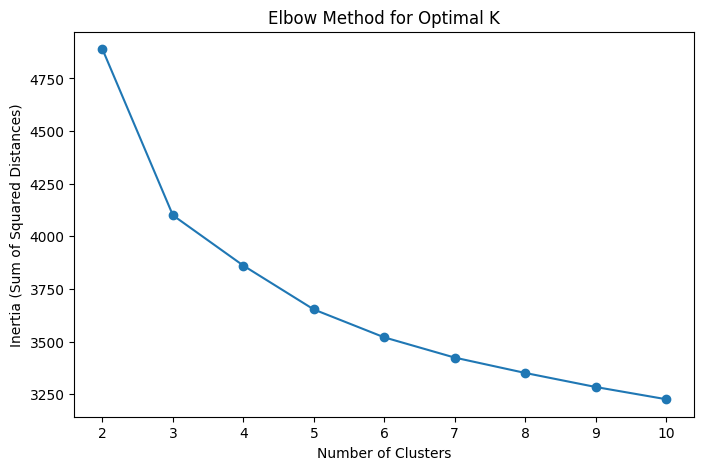

In [5]:
# Step 3: Finding the Optimal Number of Clusters 
clusters = range(2, 11)
inertia = []

for k in clusters:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(df_scaled)
    inertia.append(km.inertia_)
   

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(clusters, inertia, marker = "o")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Elbow Method for Optimal K")
plt.show()

In [14]:
# Step 4: Applying K-Means with Optimal K 

optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(df_scaled)

df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,cluster,tsne-x,tsne-y
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues,1,-13.515494,31.066637
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues,3,-13.506606,31.556166
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues,1,-14.504641,31.274794
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues,3,-13.755130,31.185280
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues,3,-13.884722,30.979515


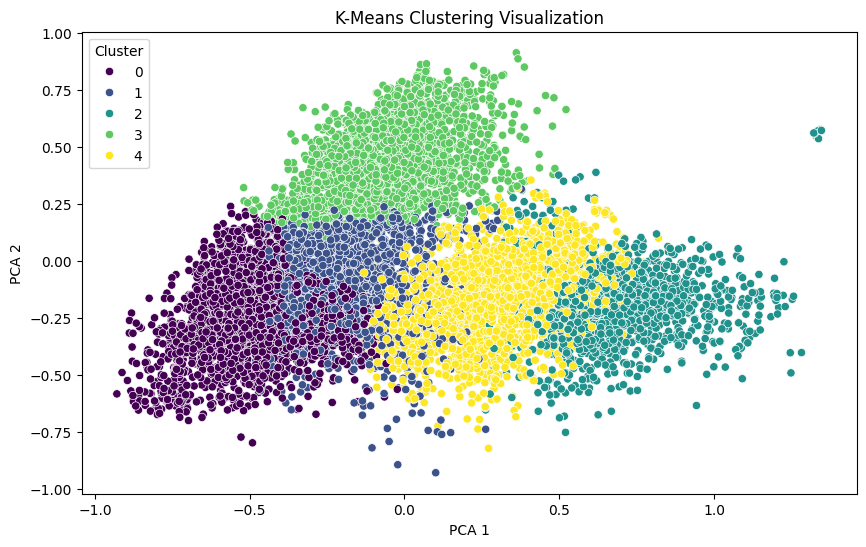

In [15]:
# Step 5: Visualizing Clusters using PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_pca["cluster"] = df["cluster"]

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_pca["PC1"], y=df_pca["PC2"], hue=df["cluster"], palette="viridis")
plt.title("K-Means Clustering Visualization")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.show()

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import cosine_similarity

# 1. Silhouette Score -> Measures how well-separated clusters are. Values range from -1 to 1 (higher is better).
silhouette_avg = silhouette_score(df_scaled, df["cluster"])
print(f"Silhouette Score: {silhouette_avg:}")

# 2. Cosine Similarity -> Within Clusters Checks if music samples in the same cluster are perceptually similar (high correlation is good)
cluster_similarities = {}
for cluster in df["cluster"].unique():
    cluster_points = df_scaled[df["cluster"] == cluster]
    if len(cluster_points) > 1:
        similarity_matrix = cosine_similarity(cluster_points)
        avg_similarity = np.mean(similarity_matrix)
        cluster_similarities[cluster] = avg_similarity

print("\nAverage Cosine Similarity Per Cluster:")
for cluster, sim in cluster_similarities.items():
    print(f"Cluster {cluster}: {sim:}")

Silhouette Score: 0.16210912158215077

Average Cosine Similarity Per Cluster:
Cluster 1: 0.9447115993915971
Cluster 3: 0.9662080562445532
Cluster 0: 0.9364102278698215
Cluster 4: 0.9613218339112904
Cluster 2: 0.95096505162361
